# Question 1

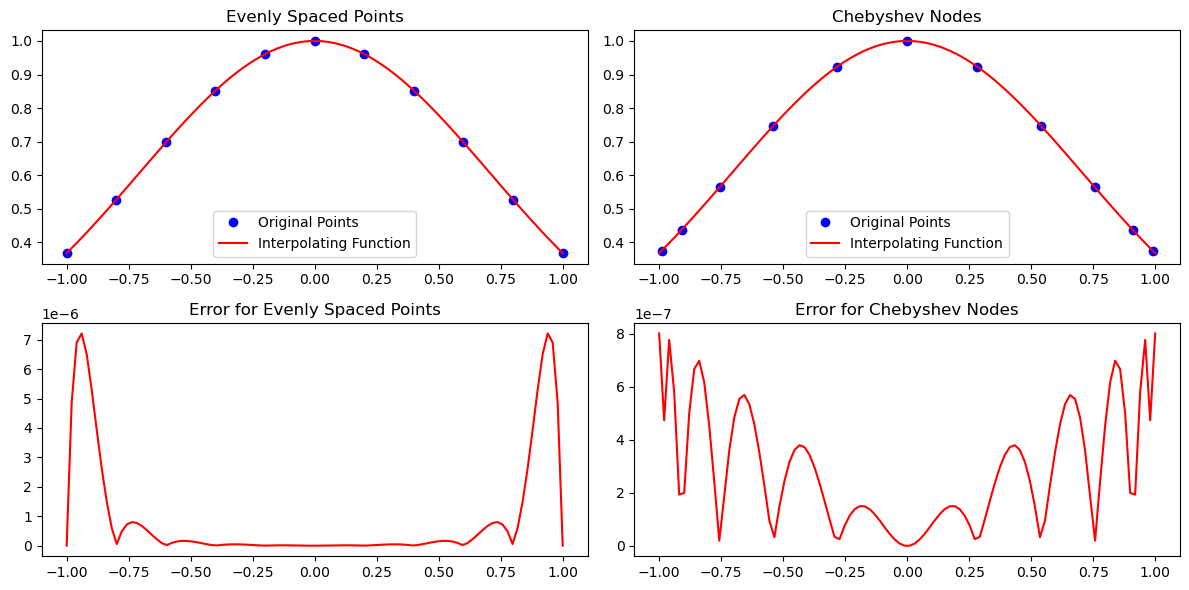

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

# Define the function f(x)
def f(x):
    return np.exp(-x**2)

# To generate evenly spaced points
x_even = np.linspace(-1, 1, 11)
y_even = f(x_even)

# Generating Chebyshev nodes
n = 10
x_cheb = np.cos((2*np.arange(0, n+1) + 1) * np.pi / (2*(n+1)))
y_cheb = f(x_cheb)

# Interpolate using evenly spaced points
x_interp_even = np.linspace(-1, 1, 100)
y_interp_even = barycentric_interpolate(x_even, y_even, x_interp_even)

# Interpolate using Chebyshev nodes
x_interp_cheb = np.linspace(-1, 1, 100)
y_interp_cheb = barycentric_interpolate(x_cheb, y_cheb, x_interp_cheb)

# Calculate the error
error_even = np.abs(f(x_interp_even) - y_interp_even)
error_cheb = np.abs(f(x_interp_cheb) - y_interp_cheb)

# Plotting
plt.figure(figsize=(12, 6))

# Plot original points and interpolating function for evenly spaced points
plt.subplot(2, 2, 1)
plt.plot(x_even, y_even, 'bo', label='Original Points')
plt.plot(x_interp_even, y_interp_even, 'r-', label='Interpolating Function')
plt.title('Evenly Spaced Points')
plt.legend()

# Plot original points and interpolating function for Chebyshev nodes
plt.subplot(2, 2, 2)
plt.plot(x_cheb, y_cheb, 'bo', label='Original Points')
plt.plot(x_interp_cheb, y_interp_cheb, 'r-', label='Interpolating Function')
plt.title('Chebyshev Nodes')
plt.legend()

# Plot error for evenly spaced points
plt.subplot(2, 2, 3)
plt.plot(x_interp_even, error_even, 'r-')
plt.title('Error for Evenly Spaced Points')

# Plot error for Chebyshev nodes
plt.subplot(2, 2, 4)
plt.plot(x_interp_cheb, error_cheb, 'r-')
plt.title('Error for Chebyshev Nodes')

plt.tight_layout()
plt.show()


# Question 2

Coefficients:
Segment 1: a=1.0, b=-0.004196678328098044, c=0.0, d=-0.9059497701513185
Segment 2: a=0.8802485040505603, b=-0.06263799076723375, c=-0.9706604680192698, d=1.0147075293081655
Segment 3: a=0.6003730411984044, b=-0.3619008411975444, c=0.11652617052519329, d=0.2916083078629832
Segment 4: a=0.3172836267015646, b=-0.3393941635493162, c=0.4289636432355324, d=-0.009158343061452126
Segment 5: a=0.12992260830505947, b=-0.21408533684743347, c=0.41915113281254796, d=-0.1906044198910426
Segment 6: a=0.04122231635355608, b=-0.0913290006699612, c=0.21493211150071656, d=-0.12952116449054177
Segment 7: a=0.010134227381485745, b=-0.028559502277663802, c=0.07615943526085046, d=-0.05365750311632012
Segment 8: a=0.0019304541362277093, b=-0.006496962764125513, c=0.018669253350507464, d=-0.014238626705909828
Segment 9: a=0.00028493048887656886, b=-0.0011179580972940572, c=0.003413581879889789, d=-0.0027716198110535467
Segment 10: a=3.2585842174076e-05, b=-0.00014101756999738708, c=0.000443989225

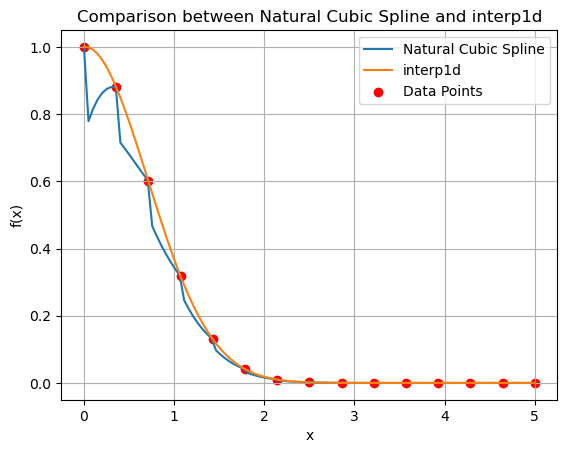

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def natural_cubic_spline(x, y):
    n = len(x)
    h = np.diff(x)
    alpha = np.zeros(n)
    for i in range(1, n-1):
        alpha[i] = 3/h[i] * (y[i+1] - y[i]) - 3/h[i-1] * (y[i] - y[i-1])
    
    l = np.zeros(n)
    u = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    u[0] = z[0] = 0
    
    for i in range(1, n-1):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * u[i-1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    l[-1] = 1
    z[-1] = 0
    c = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)
    c[-1] = 0
    
    for j in range(n-2, -1, -1):
        c[j] = z[j] - u[j] * c[j+1]
        b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
    
    a = y[:-1]
    
    # Calculate the coefficients
    delta = np.diff(y)
    a = y[:-1]
    b = delta - h * (2 * c[:-1] + c[1:]) / 3
    d = (c[1:] - c[:-1]) / (3 * h)
    
    return a, b, c[:-1], d

# Testing the function with example data
x = np.linspace(0, 5, 15)
f_x = np.exp(-x**2)

a, b, c, d = natural_cubic_spline(x, f_x)

# Print the coefficients
print("Coefficients:")
for i in range(len(a)):
    print(f"Segment {i+1}: a={a[i]}, b={b[i]}, c={c[i]}, d={d[i]}")

# Interpolate using scipy's interp1d function
f_interp1d = interp1d(x, f_x, kind='cubic')

# Generate points for comparison
x_interp = np.linspace(0, 5, 100)
y_spline = np.zeros_like(x_interp)
y_interp1d = f_interp1d(x_interp)

# Evaluate the spline at the interpolated points
for i, xi in enumerate(x_interp):
    idx = np.searchsorted(x, xi)
    if idx == len(x):
        idx -= 1
    h = xi - x[idx]
    if idx < len(x) - 1:
        y_spline[i] = a[idx] + b[idx] * h + c[idx] * h**2 + d[idx] * h**3
    else:
        y_spline[i] = a[idx - 1] + b[idx - 1] * h + c[idx - 1] * h**2 + d[idx - 1] * h**3

# Plotting
plt.plot(x_interp, y_spline, label='Natural Cubic Spline')
plt.plot(x_interp, y_interp1d, label='interp1d')
plt.scatter(x, f_x, color='red', label='Data Points')
plt.legend()
plt.title('Comparison between Natural Cubic Spline and interp1d')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()
